In [1]:
import jax.numpy as jnp

from score_means.manifolds import nSphere, SPDN, HyperbolicSpace

In [2]:
M = HyperbolicSpace(dim=2)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
x0 = jnp.zeros(3)
x0 = x0.at[-1].set(1)
v = jnp.ones(3)

In [4]:
test = M.Exp(x0, M.TM_proj(x0,v))

In [5]:
test

Array([1.3682989, 1.3682989, 2.1781836], dtype=float32)

In [6]:
M.dot(test, test)

Array(-0.99999976, dtype=float32)

In [16]:
test = M.sample(100, x0=jnp.zeros(3), sigma=1.0).reshape(-1,3)

In [19]:
M.dot(test[20],test[20])

Array(-0.99999994, dtype=float32)

In [18]:
jnp.mean(test, axis=0)

Array([ 0.04333124, -0.09382827,  1.7235503 ], dtype=float32)

In [4]:
import jax.scipy as jscipy

In [5]:
jscipy.linalg.sqrtm(x0)

Array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]], dtype=complex64)

In [6]:
M.Exp(x0, v)

Array([2.718282, 0.      , 0.      , 2.718282], dtype=float32)

In [2]:
from score_means.sampling import BrownianMotion

In [3]:
import jax.numpy as jnp

In [4]:
M = nSphere(dim=2)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [5]:
M.Exp(jnp.array([0.0,0.0,1.0]), jnp.array([1.0,1.0,0.0]))

Array([0.69845605, 0.69845605, 0.15594372], dtype=float32)

In [6]:
M.Log(jnp.array([0.0,0.0,1.0]), jnp.array([0.0,1.0,0.0]))

Array([0.       , 1.5707964, 0.       ], dtype=float32)

In [7]:
M.TM_proj(jnp.array([0.0,0.0,1.0]), jnp.array([1.0,1.0,1.0]))

Array([1., 1., 0.], dtype=float32)

In [8]:
Sampling = BrownianMotion(M, seed=8382732837, dt_steps=1000)

In [9]:
test = Sampling(jnp.array([[0.0,0.0,1.0], [0.0,0.0,-1.0]]), 1.0)

In [10]:
test[3].shape

(1000, 2, 3)

In [11]:
test[2]

Array([[[ 0.00013191, -0.04751522, -0.05041139],
        [ 0.00075609, -0.00632914,  0.01182346]],

       [[ 0.02447059,  0.0061858 , -0.0622659 ],
        [ 0.03511713,  0.00164657,  0.03886116]],

       [[-0.07822179,  0.0526394 ,  0.01280418],
        [-0.00630869,  0.03161469, -0.02420255]],

       ...,

       [[-0.02944223, -0.02413257, -0.00653763],
        [-0.00071731, -0.01527772,  0.05545408]],

       [[ 0.02844528, -0.06381743, -0.00999318],
        [ 0.00095879,  0.00185561,  0.0009922 ]],

       [[-0.02789673,  0.00149005, -0.00311676],
        [ 0.01952827, -0.00492858, -0.01298104]]], dtype=float32)

In [12]:
data_path = f"data/nSphere2/"

In [13]:
import pandas as pd
X_obs = jnp.array(pd.read_csv(''.join((data_path, 'xs.csv')), header=None))

In [14]:
from abc import ABC
import matplotlib.pyplot as plt

class EllipsoidPlot(ABC):
    def __init__(self, params=jnp.linspace(0.5,1.0,3)[::-1]):
        
        self.params = params

    def grid(self, n_points:int=100):
        
        theta = jnp.linspace(0.0, jnp.pi*1, n_points)
        phi   = jnp.linspace(0.0, jnp.pi*2, n_points)

        # Creating the coordinate grid for the unit sphere.
        x1 = jnp.outer(jnp.sin(theta), jnp.cos(phi))
        x2 = jnp.outer(jnp.sin(theta), jnp.sin(phi))
        x3 = jnp.outer(jnp.cos(theta), jnp.ones(n_points))
        
        return self.params[0]*x1,self.params[1]*x2,self.params[2]*x3
         

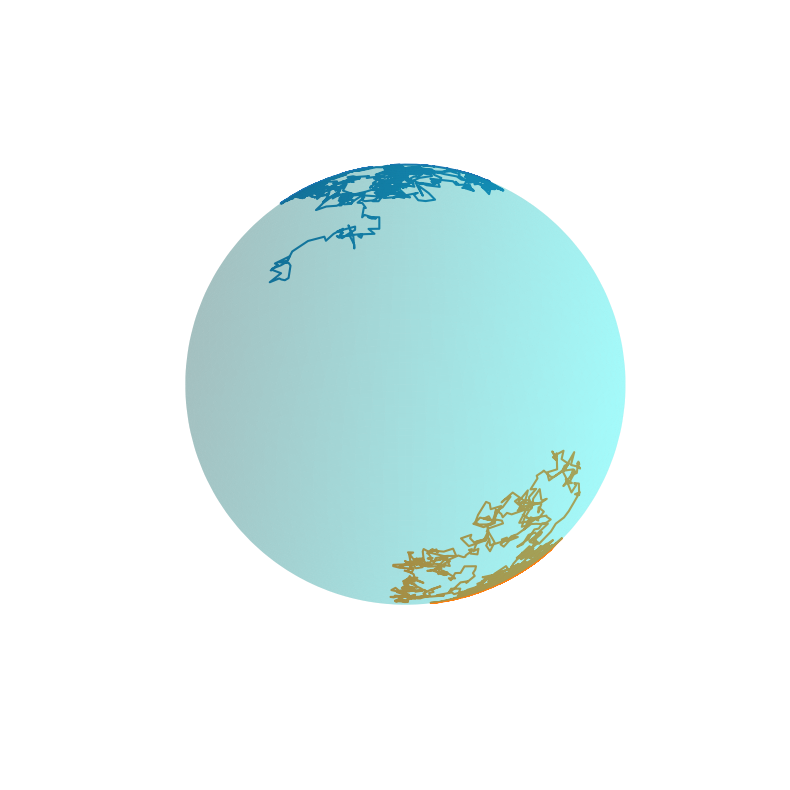

In [18]:
fig = plt.figure(figsize=(10,10))

#plotting sphere
plot_sphere = EllipsoidPlot(params=jnp.ones(3))
x1,x2,x3 = plot_sphere.grid(100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, x3, color='cyan', rstride=1, cstride=1, alpha=0.2)
ax.set_box_aspect([1,1,1])
ax.set_xlim([-1.0,1.0])
ax.set_ylim([-1.0,1.0])
ax.set_zlim([-1.0,1.0])
#ax.scatter(X_obs[:,0], X_obs[:,1], X_obs[:,2])
ax.plot(test[3][:,0,0],test[3][:,0,1], test[3][:,0,2])
ax.plot(test[3][:,1,0],test[3][:,1,1], test[3][:,1,2])
ax.set_axis_off()